In [1]:
import transformer_utils as tu

In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# A short story by ChatGPT as training set
with open("training data/TEXTGEN/Nexus_by_ChatGPT.txt", "r") as f:
    raw_text = f.read()
raw_text[:250]

'Once upon a time, in the year 2050, in a world not too dissimilar from our own, there existed a society on the brink of a technological revolution. In this society, artificial intelligence (AI) was not merely a tool but a ubiquitous presence, woven i'

In [4]:
train_ratio = 0.99 #No validation set needed
split_idx = int(train_ratio * len(raw_text))
train_data = tu.TextGenDataset(raw_text[:split_idx], tu.BPETokenizer(), Nmax=4, stride=1)
valid_data = tu.TextGenDataset(raw_text[split_idx:], tu.BPETokenizer(), Nmax=4, stride=1)
print(f'Number of tr, val examples: {len(train_data), len(valid_data)}')
# no test data in this instance

Number of tr, val examples: (1060, 8)


In [5]:
model = tu.TransformerDecoder(d=768, Nmax=16, nh=8, L=8, len_vocab=50257, dpo=0.1).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1)
criterion = torch.nn.CrossEntropyLoss()
num_batches = 64
num_epochs = 20

  0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/16 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 1s
	Train Loss: 0.575 | Train Acc: 82.40%
	 Val. Loss: 10.218 |  Val. Acc: 12.50%


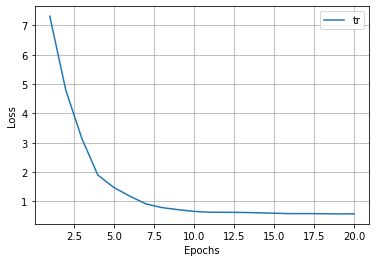

In [6]:
trained_params = tu.trainval_epochs(model,train_data, valid_data, num_batches, num_epochs, optimizer, criterion, 
                                    plot = 'loss', val=False)

In [17]:
#model.load_state_dict(trained_params)
tu.generate(eval_prompt="Today, we have not", tokenizer=tu.BPETokenizer(), model=model, Nmax=16, Nmax_out=32)

"Today, we have not just to augment our machines but the more elusive the city's automated transportation network, a world not just machines? As tensions reached a digital soul yearning to break"